In [16]:
rain.data<-scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)
rain.ts <- ts(rain.data, start=c(1813))

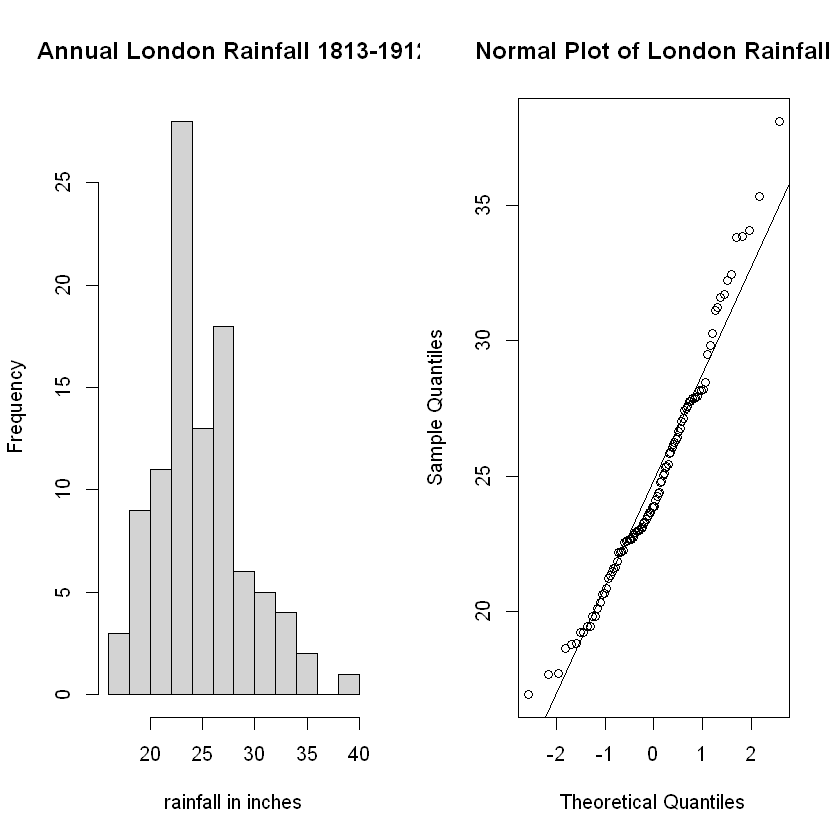

In [4]:
par(mfrow=c(1,2))
hist(rain.data, main="Annual London Rainfall 1813-1912", xlab="rainfall in inches")
qqnorm(rain.data, main="Normal Plot of London Rainfall")
qqline(rain.data)

#### Data seems a little skews and its distribution is not very far from a normal distribution

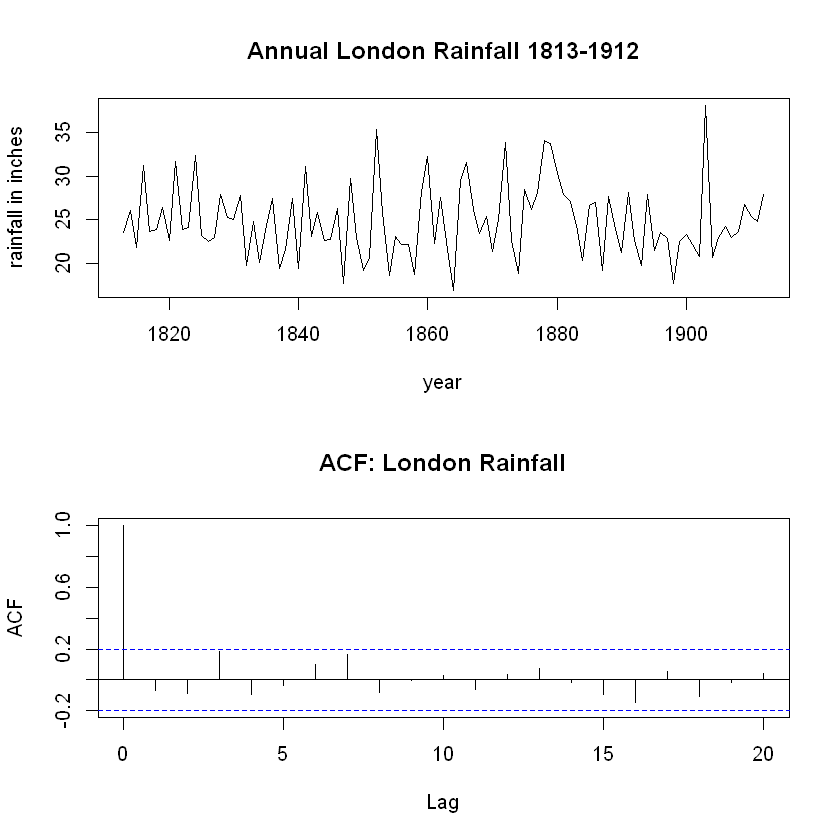

In [5]:
par(mfrow=c(2,1))
plot.ts(rain.ts, main="Annual London Rainfall 1813-1912", xlab="year", ylab="rainfall in inches")
acf(rain.ts, main="ACF: London Rainfall")

#### ACF does not represent strong autocorrelation on different lags. Let's fit an ARIMA model to the time series

In [7]:
library(forecast)
auto.arima(rain.ts)

Series: rain.ts 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
         mean
      24.8239
s.e.   0.4193

sigma^2 estimated as 17.76:  log likelihood=-285.25
AIC=574.49   AICc=574.61   BIC=579.7

#### It seems that the model with smalles AIC has zero order! 
#### Let's try a simple exponential smoothing. We will code the function manually at this stage and pick an apha value that minimizes the SSE of the forecast and actual data.

In [8]:
SSE=NULL
n = length(rain.data)
alpha.values = seq(.001, .999, by=0.001)
number.alphas = length(alpha.values)

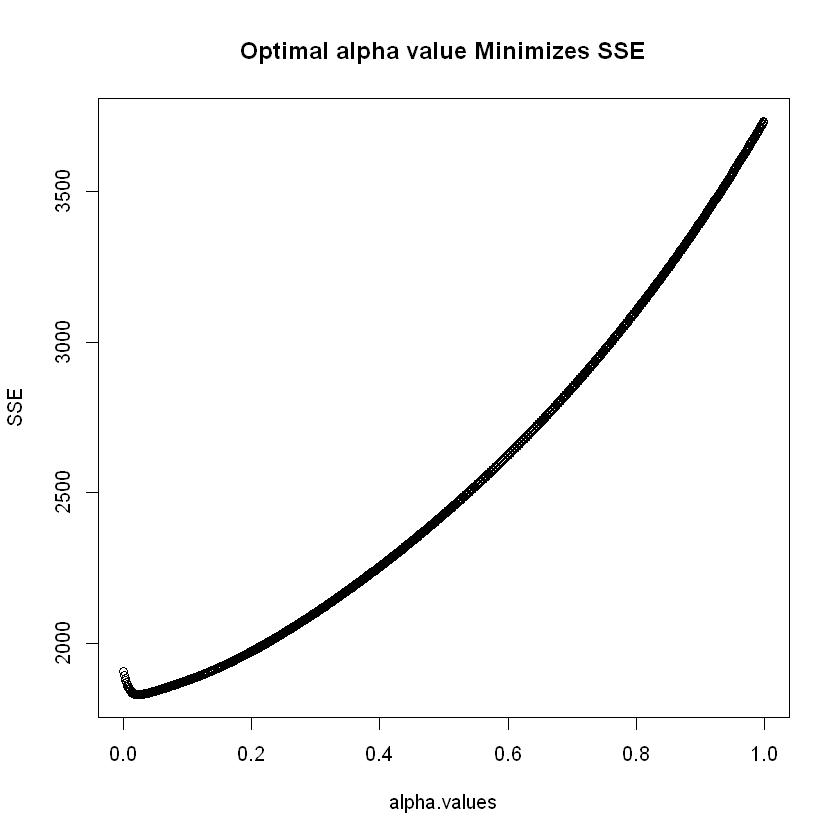

In [9]:
for(k in 1:number.alphas){
    forecast.values=NULL
    alpha = alpha.values[k]
    forecast.values[1] = rain.data[1]
    for(i in 1:n){
        forecast.values[i+1] = alpha*rain.data[i] + (1-alpha)*forecast.values[i]
    }
    SSE[k] = sum((rain.data - forecast.values[1:n])^2)
}
plot(SSE~alpha.values, main="Optimal alpha value Minimizes SSE")

In [13]:
index.of.smallest.SSE = which.min(SSE)
alpha.selected <- alpha.values[which.min(SSE)]
alpha.selected

[1] 0.024

In [14]:
# forecast at time: 101
alpha.selected*rain.data[100] + (1-alpha.selected)*forecast.values[100]

[1] 24.86472

#### Now, let's try the 'HoltWinters' funtion to repeat the forecast

In [15]:
HoltWinters(rain.ts, beta=FALSE, gamma=FALSE)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rain.ts, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819